# Analysis notebook: `SU2020b_signal_onspill-LH_aw`  

## Define analysis name

In [1]:
ana_label = "SU2020b_signal_onspill-LH_aw"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020b_signal_onspill-LH_aw

analysis.csv  hists.h5	   SU2020b_signal_onspill-LH_aw.log
cut_flow.csv  results.pkl  SU2020b_signal_onspill-LH_aw.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020b_signal_onspill-LH_aw


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020b_signal_onspill-LH_aw/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020b_signal_onspill-LH_aw/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020b_signal_onspill-LH_aw/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020b_signal_onspill-LH_aw/analysis.csv
[Load] ⚠️ File not found: ../../../output/results/SU2020b_signal_onspill-LH_aw/events.parquet
[Load] ⚠️ File not found: ../../../output/results/SU2020b_signal_onspill-LH_aw/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,1493499,100.000,100.000,No selection applied
1,has_trk_front,Preselect,1493210,99.981,99.981,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,1491985,99.899,99.918,Electron track fits
3,is_downstream,Preselect,1491979,99.898,100.000,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,1487812,99.619,99.721,One reco electron / event
5,is_truth_electron,Preselect,1487811,99.619,100.000,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,1352474,90.557,90.904,Track fit quality > 0.2
7,within_t0,Tracker,970592,64.988,71.764,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,has_hits,Tracker,938564,62.843,96.700,>20 active tracker hits
9,within_t0err,Tracker,906498,60.696,96.584,Track fit t0 uncertainty (t0err < 0.9 ns)


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,832408,785908,579363,0,0,0
1,N,4000000,4000000,4000000,832408,785908,579363
2,Eff [%],20.8102,19.6477,14.484075,100.0,100.0,100.0
3,Eff Err$-$ [%],-0.02029,-0.019859,-0.017588,-0.00012,-0.000127,-0.000173
4,Eff Err$+$ [%],0.020305,0.019874,0.017606,0.0,0.0,0.0
5,Rate 1B [$\text{day}^{-1}$],832408.0,785908.0,579363.0,0.0,0.0,0.0
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-907.311037,-881.604853,-756.944019,0.0,0.0,0.0
7,Rate 1B Err$+$ [$\text{day}^{-1}$],908.304213,882.598045,757.937303,1.139434,1.139434,1.139434
8,Rate 2B [$\text{day}^{-1}$],832408.0,785908.0,579363.0,0.0,0.0,0.0
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-907.311037,-881.604853,-756.944019,0.0,0.0,0.0


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020b_signal_onspill-LH_aw/h1o_1x3_mom_windows.png


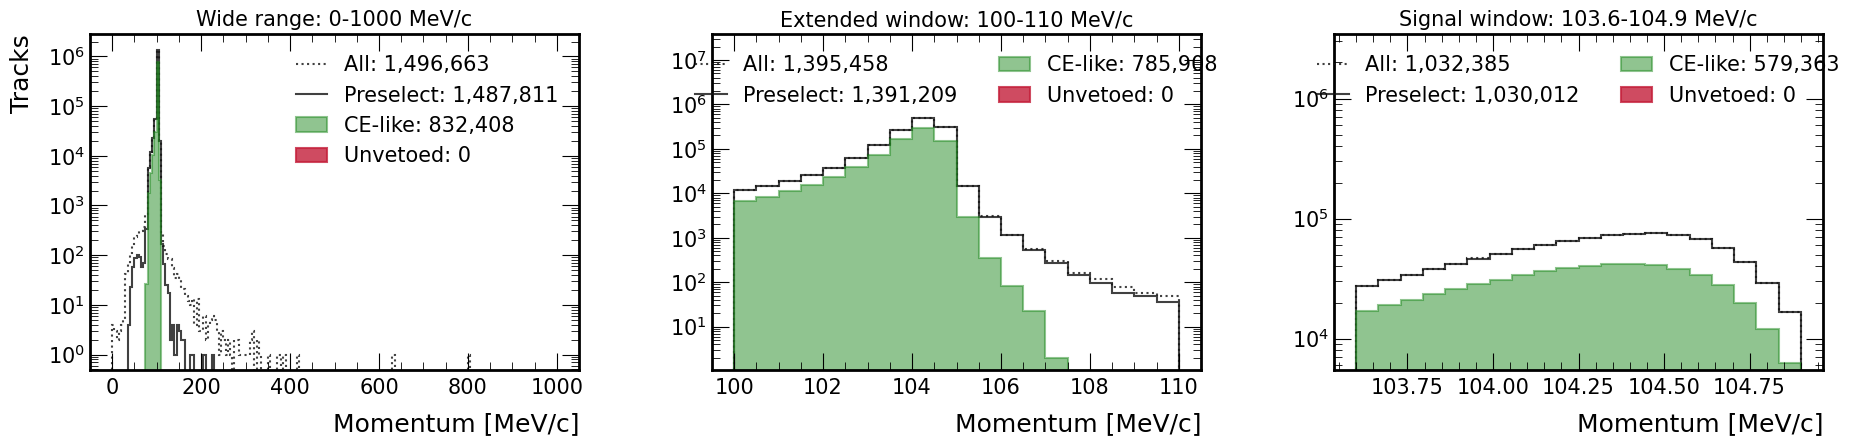

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_signal_onspill-LH_aw/h1o_3x3_summary.png


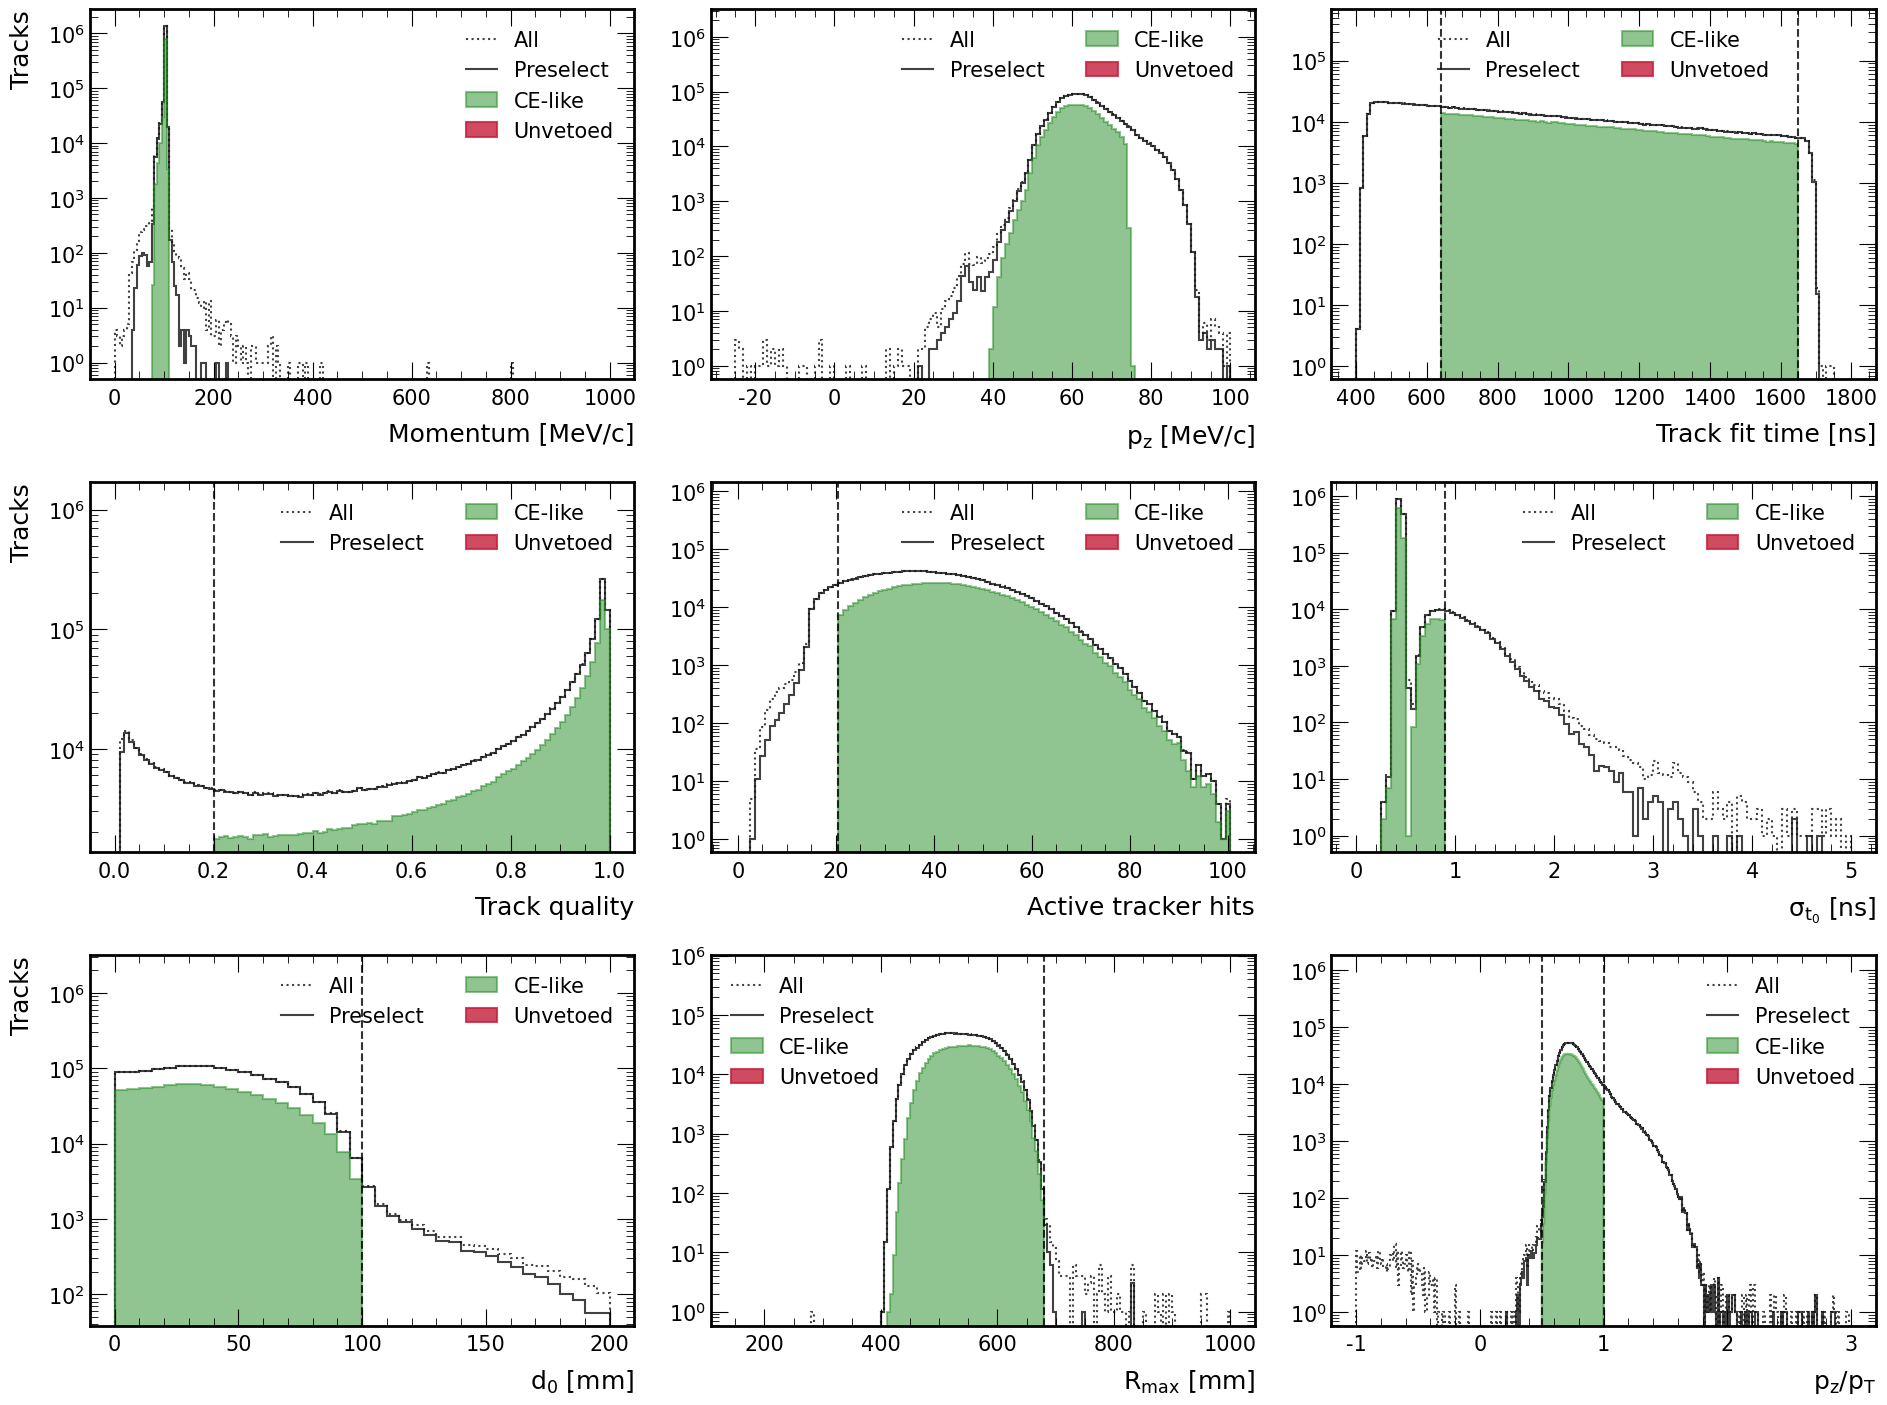

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_signal_onspill-LH_aw/h1o_2x2_mom_summary.png


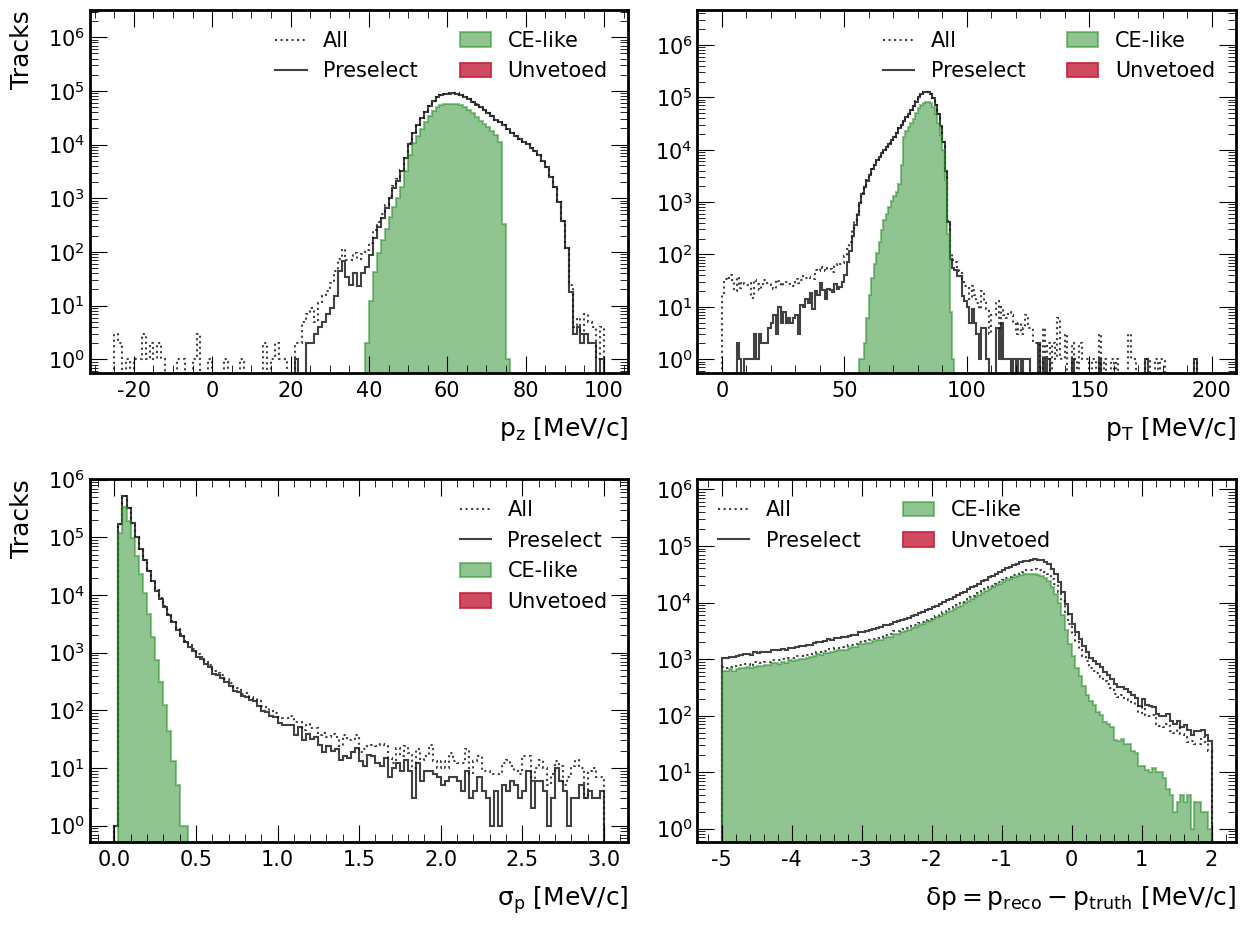

In [11]:
draw.plot_mom_summary(results["hists"], out_path=f"{img_dir}/h1o_2x2_mom_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_signal_onspill-LH_aw/h1o_crv_z.png


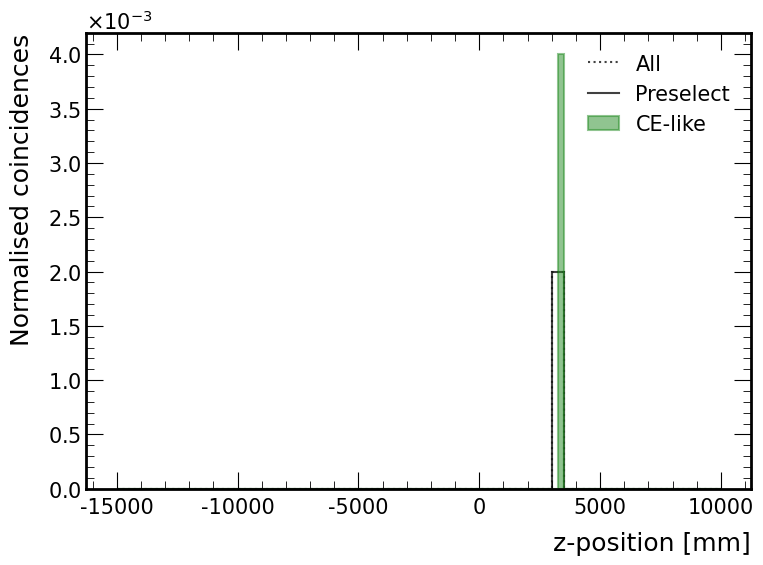

In [12]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [13]:
print(results["event_info"])

None


In [14]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))